In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates


from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [20]:
import matplotlib, wordcloud, sklearn 

# print modules and its version
modules = [pd, np, matplotlib, sklearn, re, nltk, wordcloud]
for m in modules:
  print(m.__name__, m.__version__)

pandas 1.0.5
numpy 1.18.5
matplotlib 3.2.2
sklearn 0.22.2.post1
re 2.2.1
nltk 3.2.5
wordcloud 1.5.0


In [21]:
# uncomment this line if you are not working on google colab
%cd /content/drive/"My Drive"/"Colab Notebooks"/AirBNB

/content/drive/My Drive/Colab Notebooks/AirBNB


In [22]:
!pwd

/content/drive/My Drive/Colab Notebooks/AirBNB


# 1. Business Understanding

For this project, we are going to use a public dataset from AirBNB. Then we impose 3 questions related to the AirBNB business as a home rental company. These questions are :

1. In which time interval the home rental price reaches the highest peak during the year 2016?

2. What words that are most relevant to good or bad rating towards a rental homestay?

3. How well can we predict a rental price? What aspects correlate well to the rental price?

These 3 questions will be answered by understanding the data we acquired from [Seattle AirBNB Data](https://www.kaggle.com/airbnb/seattle/data). The dataset consist of three CSV files :
1. calendar.csv including listing_id and the price and availability for that day.

2. reviews.csv including unique_id for each reviewer and detailed comments.

3. listings.csv including full descriptions and average review score of each rental home.

For each question, we will explore and prepare the data accordingly (like imputation, handling categorical variables, etc.). Then a machine learning model will be used for the prediction task. 


In [4]:
seattle_calendar_df = pd.read_csv('data/calendar.csv')
seattle_listings_df = pd.read_csv('data/listings.csv')
seattle_reviews_df = pd.read_csv('data/reviews.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
seattle_calendar_df.head()

listing_id        date available   price
0     241032  2016-01-04         t  $85.00
1     241032  2016-01-05         t  $85.00
2     241032  2016-01-06         f     NaN
3     241032  2016-01-07         f     NaN
4     241032  2016-01-08         f     NaN

In [6]:
seattle_listings_df.head()

id  ... reviews_per_month
0   241032  ...              4.07
1   953595  ...              1.48
2  3308979  ...              1.15
3  7421966  ...               NaN
4   278830  ...              0.89

[5 rows x 92 columns]

In [7]:
seattle_reviews_df.head()

listing_id  ...                                           comments
0     7202016  ...  Cute and cozy place. Perfect location to every...
1     7202016  ...  Kelly has a great room in a very central locat...
2     7202016  ...  Very spacious apartment, and in a great neighb...
3     7202016  ...  Close to Seattle Center and all it has to offe...
4     7202016  ...  Kelly was a great host and very accommodating ...

[5 rows x 6 columns]

## Question 1
In which time interval the home rental price reaches the highest peak during the year 2016?

We investigate this question by creating a plot of the average price for each day. Then by analyzing the plot, we find the interval peak.

In [ ]:
copy_seattle_calendar_df = seattle_calendar_df.copy()

In [ ]:
# check NaN value
copy_seattle_calendar_df.isnull().sum() 

listing_id         0
date               0
available          1
price         472005
dtype: int64

In [ ]:
# check why price has many NaNs
copy_seattle_calendar_df.head(10)

listing_id        date available   price
0     241032  2016-01-04         t  $85.00
1     241032  2016-01-05         t  $85.00
2     241032  2016-01-06         f     NaN
3     241032  2016-01-07         f     NaN
4     241032  2016-01-08         f     NaN
5     241032  2016-01-09         f     NaN
6     241032  2016-01-10         f     NaN
7     241032  2016-01-11         f     NaN
8     241032  2016-01-12         f     NaN
9     241032  2016-01-13         t  $85.00

In [ ]:
# price column with NaN value means that the homestay was not rented at that day, 
# so we just drop them.
copy_seattle_calendar_df.dropna(axis=0, inplace=True)

In [ ]:
# remove punctuation and unnecessary zeros in price column
copy_seattle_calendar_df['price'] = copy_seattle_calendar_df['price'].str.replace(r'[^0-9.]', '').astype(float)

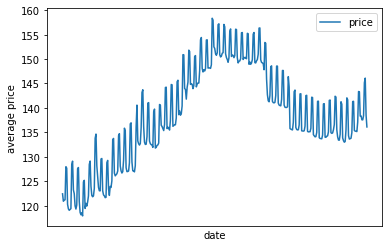

In [ ]:
# average price for each date, then plot them 
mean_price = copy_seattle_calendar_df.groupby(['date'])['price'].mean()
ax = mean_price.to_frame().plot(kind='line', x_compat=True)
ax.set_xlabel("date")
ax.set_ylabel("average price")
ax.xaxis.set_major_locator(mdates.MonthLocator())

fig = ax.get_figure()
fig.savefig('image/price_2016.png')

In [ ]:
# From the plot above, we can see that the peak interval is above 150.
# So we can check which date has price larger than 150.
mean_price[mean_price >= 150.0].index

Index(['2016-05-27', '2016-05-28', '2016-06-03', '2016-06-04', '2016-06-10',
       '2016-06-11', '2016-06-17', '2016-06-18', '2016-06-24', '2016-06-25',
       '2016-07-01', '2016-07-02', '2016-07-03', '2016-07-04', '2016-07-05',
       '2016-07-06', '2016-07-07', '2016-07-08', '2016-07-09', '2016-07-10',
       '2016-07-11', '2016-07-12', '2016-07-13', '2016-07-14', '2016-07-15',
       '2016-07-16', '2016-07-17', '2016-07-18', '2016-07-21', '2016-07-22',
       '2016-07-23', '2016-07-24', '2016-07-25', '2016-07-26', '2016-07-27',
       '2016-07-28', '2016-07-29', '2016-07-30', '2016-07-31', '2016-08-04',
       '2016-08-05', '2016-08-06', '2016-08-08', '2016-08-09', '2016-08-10',
       '2016-08-11', '2016-08-12', '2016-08-13', '2016-08-19', '2016-08-20',
       '2016-08-25', '2016-08-26', '2016-08-27', '2016-09-02', '2016-09-03'],
      dtype='object', name='date')

**ANSWER**

We find that the rental price reached peak season from late May to early September. This finding makes sense since that period is summer and people tend to spend their vacation during this time, especially for 4 seasons countries like the USA. 

## Question 2

What words that are most relevant to good or bad rating towards a rental homestay?

For this question, we would like to know which words are most associated with a good or bad rating. These words will help us identify what description of ideal homestay and acquire feedback directly from a customer perspective. Thus, it gives the renter or company suggestions to improve their business.

Since there is no hard label for good or bad reviews, we cannot just print out the most frequent word on good or bad reviews to see which words have the most influence on each category. Instead, we will build a regression model on review text features (using TF-IDF) then we can find which words or phrases have a significant influence on the rating based on its coefficients.

In [ ]:
# if a comments is NaN in reviews dataframe then drop the rows
seattle_reviews_df.dropna(axis=0, inplace=True)

In [ ]:
# drop NaN rating
rating_df = seattle_listings_df[['id', 'review_scores_rating']].dropna(axis=0).rename(columns={"id": "listing_id"})

In [ ]:
# combine all reviews for single listing_id
review_df = seattle_reviews_df.groupby(['listing_id'])['comments'].apply(','.join).to_frame().reset_index()

In [ ]:
# join reviews and rating dataframe
rating_review_df = review_df.merge(rating_df, on='listing_id')

In [ ]:
stop_words = stopwords.words("english")
stop_words.remove('not')

lemmatizer = WordNetLemmatizer()

In [ ]:
# function to tokenize the reviews
def tokenize(text):
    # normalize case and remove punctuation
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    
    tokens = word_tokenize(text)

    clean_tokens = []
    for tok in tokens:
        if not tok in stop_words:
            clean_tok = lemmatizer.lemmatize(tok).lower().strip()
            clean_tokens.append(clean_tok)

    return clean_tokens

In [ ]:
corpus = rating_review_df['comments'].values

In [ ]:
# use bigram for counter
vect = CountVectorizer(tokenizer=tokenize, ngram_range=(2,2))
# use tf-idf as text feature extractor
tfidf = TfidfTransformer()

In [ ]:
corpus_vect = vect.fit_transform(corpus)

corpus_tfidf = tfidf.fit_transform(corpus_vect)

In [ ]:
# train simple regression model
lr_model= LinearRegression().fit(corpus_tfidf, rating_review_df['review_scores_rating'].values)

In [ ]:
# function to create dataframe to pair each phrase/word with its coefficients
def coef_weights(lm_model, feature_name):
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = feature_name
    coefs_df['coefs'] = lm_model.coef_
    coefs_df = coefs_df.sort_values('coefs', ascending=False)
    return coefs_df

In [ ]:
# function to dictionary of phrase/word with its coefficients
def create_word_dict(df) :
  word_dict = dict()
  for index, row in df.iterrows():
    word_dict[row['est_int']] = np.abs(int(row['coefs']))

  return word_dict

In [ ]:
coefs_df = coef_weights(lr_model, vect.get_feature_names())

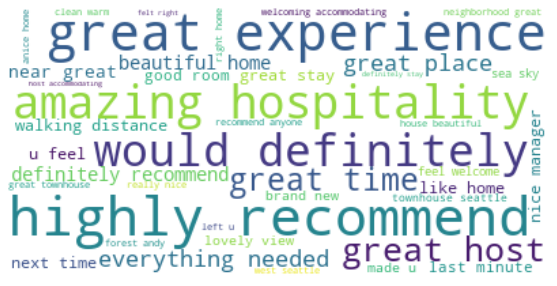

In [ ]:
# visualize top 40 phrase/word that has most positive influence
wordcloud = WordCloud(max_font_size=500, max_words=100, background_color="white").generate_from_frequencies(create_word_dict(coefs_df[:40]))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('positive_words.png')
plt.show()

**ANSWER**

From the feedback, we can grasp the idea of what makes the customer happy. Mainly, these are the hospitality of the host and its homestay quality. Other things that make a good review are walking distance with important places (such as tourist attraction or public transportation) or having an amazing view.

In [133]:
# find indices where reviews contain 'walking distance'
np.where(seattle_reviews_df['comments'].str.contains('walking distance', regex=False))

(array([   11,    26,    40, ..., 84834, 84843, 84847]),)

In [135]:
seattle_reviews_df['comments'][11]

"The listing was exactly as described!  Kelly's place was wonderful and cleen.  it was just what we were looking for.\r\nWe only got to meet her for a moment one evening because of our varied schedule, but she was warm and welcoming to us.\r\nHer place is also in good walking distance to City Center!  Lots to do right around there!\r\nWe would recommend her place to others who are traveling to Seattle!"

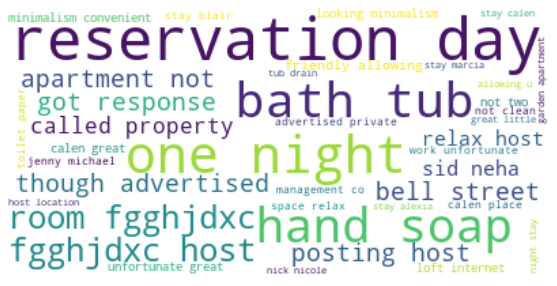

In [ ]:
# visualize bottom 40 phrase/word that has most negative influence
wordcloud = WordCloud(max_font_size=500, max_words=100, background_color="white").generate_from_frequencies(create_word_dict(coefs_df.tail(40)))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('negative_words.png')
plt.show()

**ANSWER**

Although there are some ambiguous words, we can still get some insights about bad reviews. Some of the main reasons for bad reviews are unsatisfactory rented room and unfriendly host ('fgghjdxc' might be a censored word expressing disappointment). We can also interpret some phrases as the service supposedly existing, like hand soap. We suspect that the customer is disappointed because the hand soap is not provided or maybe it is not appropriate to be served. We find one example below. 

In [ ]:
# find indices where reviews contain 'hand soap'
np.where(seattle_reviews_df['comments'].str.contains('hand soap', regex=False))

(array([ 4896,  6393,  8709, 13557, 16498, 20729, 20730, 23405, 25400,
        27189, 28511, 30205, 30964, 32946, 33831, 34237, 35570, 36863,
        38151, 43576, 43999, 49363, 54387, 55333, 55417, 55862, 57430,
        58740, 60837, 64641, 70410, 70431, 75391, 77756, 78854, 83322]),)

In [ ]:
seattle_reviews_df['comments'][6393]

'Awesome views, great location within walking distance of all the best Seattle has to offer. Private parking space was a plus and the condo was tidy. The only downside was there was no hand soap or toilet paper... Luckily there was a grocery store next door! Lastly, Tony was accommodating when we showed up early.'

## Question 3

How well can we predict a rental price? What aspects correlate well to the rental price?

We explore the correlation between the rental price and home properties and its location. Ridge regression (linear regression with L2 penalty) is used as a machine learning model to capture the relationship. The regression coefficients explain the impact of variables and the rental price.

There are several columns that are related to a geospatial location. We choose **neighbourhood_group_cleansed** because it provides more coarse information compared to other columns like zipcode or neighbourhood_cleansed. Meanwhile, latitude and longitude specify the location for each home. 

In [48]:
print('Number of row: ', seattle_listings_df.shape[0])
print('Number of neighbourhood_cleansed unique value: ', seattle_listings_df['neighbourhood_cleansed'].drop_duplicates().count())
print('Number of neighbourhood_group_cleansed unique value: ', seattle_listings_df['neighbourhood_group_cleansed'].drop_duplicates().count())
print('Number of zipcode unique value: ', seattle_listings_df['zipcode'].drop_duplicates().count())
print('Number of latitude unique value: ', seattle_listings_df['latitude'].drop_duplicates().count())
print('Number of longitude unique value: ', seattle_listings_df['longitude'].drop_duplicates().count())

Number of row:  3818
Number of neighbourhood_cleansed unique value:  87
Number of neighbourhood_group_cleansed unique value:  17
Number of zipcode unique value:  28
Number of latitude unique value:  3818
Number of longitude unique value:  3818


### Data Imputation

After digging into the listing dataframe, we find several columns that describe the home properties, i.e. property_type, room_type, accommodates, bathrooms, bedrooms, beds, bed_type, amenities, square_feet. Before we dive in, let's check the NaN values in each column.

In [50]:
column_list = ['id', 'neighbourhood_group_cleansed', \
               'property_type', 'room_type', 'accommodates', \
               'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet'] 

In [51]:
# check the presence of NaN values
seattle_listings_df[column_list].isnull().sum() / seattle_listings_df.shape[0]

id                              0.000000
neighbourhood_group_cleansed    0.000000
property_type                   0.000262
room_type                       0.000000
accommodates                    0.000000
bathrooms                       0.004191
bedrooms                        0.001572
beds                            0.000262
bed_type                        0.000000
amenities                       0.000000
square_feet                     0.974594
dtype: float64

In [52]:
# since square_feet information overwhelmingly consist of NaN values (97 %), we discard this column
column_list.remove('square_feet')

Now we will handle some columns with a small number of NaN values. We impute these missing values using the **mode** method. It means that the missing values are filled with a value that has most count based on similar characteristics.

In [63]:
# check property_type with NaN value
seattle_listings_df[column_list][seattle_listings_df.property_type.isna()]

id  ...                                          amenities
2184  3335  ...  {"Wireless Internet",Kitchen,"Free Parking on ...

[1 rows x 10 columns]

In [65]:
# fill NaN of property_type with closest id's feature: room_type, accommodates

for idx in seattle_listings_df[seattle_listings_df['property_type'].isna()]['id']:
    
    idx_df = seattle_listings_df[seattle_listings_df.id==idx]
    row_index = idx_df.index[0]
    
    room_type = idx_df['room_type'].item()
    accommodates = idx_df['accommodates'].item()
    
    new_property_type = seattle_listings_df[(seattle_listings_df['room_type']==room_type) & 
                        (seattle_listings_df['accommodates']==accommodates)]['property_type'].mode()[0]
    
    seattle_listings_df.at[row_index, 'property_type'] =  new_property_type


In [67]:
# check the result after imputing property_type
# and it looks good
seattle_listings_df[column_list][seattle_listings_df.id==3335]

id  ...                                          amenities
2184  3335  ...  {"Wireless Internet",Kitchen,"Free Parking on ...

[1 rows x 10 columns]

In [71]:
# check bathrooms with NaN value
seattle_listings_df[column_list][seattle_listings_df['bathrooms'].isna()]

id  ...                                          amenities
1242   19611  ...  {TV,"Cable TV",Internet,"Wireless Internet","W...
1314   59827  ...  {TV,"Cable TV",Internet,"Wireless Internet","W...
1357   19623  ...  {TV,"Cable TV",Internet,"Wireless Internet","W...
1378  224763  ...  {TV,"Cable TV",Internet,"Wireless Internet","A...
1961  609252  ...                                                 {}
1975  716829  ...  {TV,"Free Parking on Premises","Pets live on t...
2048  354453  ...  {"Wireless Internet","Smoke Detector","Carbon ...
2096  143580  ...  {TV,"Cable TV","Wireless Internet","Free Parki...
2306  774659  ...  {"Cable TV","Wireless Internet",Kitchen,"Free ...
2408   10385  ...  {TV,"Cable TV",Internet,"Wireless Internet","F...
2432   11411  ...  {TV,"Cable TV",Internet,"Wireless Internet","F...
2437   10695  ...  {TV,"Cable TV",Internet,"Wireless Internet","F...
2698  387078  ...  {TV,"Cable TV",Internet,"Wireless Internet","A...
2717  745099  ...                                                 {}
2953  387079  ...  {TV,"Cable TV",Internet,"Wireless Internet","A...
3337  704477  ...                                                 {}

[16 rows x 10 columns]

In [72]:
imputed_ids = seattle_listings_df[column_list][seattle_listings_df['bathrooms'].isna()].id.tolist()

In [75]:
# fill NaN of bathrooms with closest id's feature: property_type, room_type, accommodates
for idx in seattle_listings_df[seattle_listings_df['bathrooms'].isna()]['id']:
    
    idx_df = seattle_listings_df.query("id=={}".format(str(idx)))
    row_index = idx_df.index[0]
    
    property_type = idx_df['property_type'].item() 
    # room_type = idx_df['room_type'].item()
    # accommodates = idx_df['accommodates'].item()

    new_bathrooms = seattle_listings_df[(seattle_listings_df['property_type']==property_type)]['bathrooms'].mode()[0]
    
    seattle_listings_df.at[row_index, 'bathrooms'] =  new_bathrooms


In [77]:
# check the bathrooms column after imputation
# looks good !
seattle_listings_df[column_list][seattle_listings_df.id.isin(imputed_ids)]

id  ...                                          amenities
1242   19611  ...  {TV,"Cable TV",Internet,"Wireless Internet","W...
1314   59827  ...  {TV,"Cable TV",Internet,"Wireless Internet","W...
1357   19623  ...  {TV,"Cable TV",Internet,"Wireless Internet","W...
1378  224763  ...  {TV,"Cable TV",Internet,"Wireless Internet","A...
1961  609252  ...                                                 {}
1975  716829  ...  {TV,"Free Parking on Premises","Pets live on t...
2048  354453  ...  {"Wireless Internet","Smoke Detector","Carbon ...
2096  143580  ...  {TV,"Cable TV","Wireless Internet","Free Parki...
2306  774659  ...  {"Cable TV","Wireless Internet",Kitchen,"Free ...
2408   10385  ...  {TV,"Cable TV",Internet,"Wireless Internet","F...
2432   11411  ...  {TV,"Cable TV",Internet,"Wireless Internet","F...
2437   10695  ...  {TV,"Cable TV",Internet,"Wireless Internet","F...
2698  387078  ...  {TV,"Cable TV",Internet,"Wireless Internet","A...
2717  745099  ...                                                 {}
2953  387079  ...  {TV,"Cable TV",Internet,"Wireless Internet","A...
3337  704477  ...                                                 {}

[16 rows x 10 columns]

In [81]:
# check bedrooms with NaN value
seattle_listings_df[column_list][seattle_listings_df['bedrooms'].isna()]

id  ...                                          amenities
1429  1476298  ...  {TV,Internet,"Wireless Internet","Wheelchair A...
1492   604600  ...                                                 {}
1493  1251763  ...  {"Cable TV",Internet,"Wireless Internet",Pool,...
1853    17951  ...  {TV,"Cable TV",Internet,"Wireless Internet",Ki...
2619   948077  ...  {TV,"Cable TV",Internet,"Wireless Internet",Ki...
2915  3272374  ...  {TV,"Wireless Internet",Kitchen,"Free Parking ...

[6 rows x 10 columns]

In [82]:
imputed_ids = seattle_listings_df[column_list][seattle_listings_df['bedrooms'].isna()].id.tolist()

In [83]:
# fill NaN of bedrooms with closest id's feature: room_type, property_type, accommodates, bathrooms

for idx in seattle_listings_df[seattle_listings_df['bedrooms'].isna()]['id']:
    
    idx_df = seattle_listings_df.query("id=={}".format(str(idx)))
    row_index = idx_df.index[0]
    
    room_type = idx_df['room_type'].item()
    accommodates = idx_df['accommodates'].item()
    property_type = idx_df['property_type'].item()
    bathrooms = idx_df['bathrooms'].item()    
    
    new_bedrooms = seattle_listings_df[(seattle_listings_df['room_type']==room_type) & 
                        (seattle_listings_df['accommodates']==accommodates) & 
                        (seattle_listings_df['property_type']==property_type) & 
                        (seattle_listings_df['bathrooms']==bathrooms)]['bedrooms'].mode()[0]
    
    seattle_listings_df.at[row_index, 'bedrooms'] =  new_bedrooms



In [84]:
# check the bedrooms column after imputation
# looks good !
seattle_listings_df[column_list][seattle_listings_df.id.isin(imputed_ids)]

id  ...                                          amenities
1429  1476298  ...  {TV,Internet,"Wireless Internet","Wheelchair A...
1492   604600  ...                                                 {}
1493  1251763  ...  {"Cable TV",Internet,"Wireless Internet",Pool,...
1853    17951  ...  {TV,"Cable TV",Internet,"Wireless Internet",Ki...
2619   948077  ...  {TV,"Cable TV",Internet,"Wireless Internet",Ki...
2915  3272374  ...  {TV,"Wireless Internet",Kitchen,"Free Parking ...

[6 rows x 10 columns]

In [85]:
# check beds with NaN value
seattle_listings_df[column_list][seattle_listings_df['beds'].isna()]

id neighbourhood_group_cleansed  ...  bed_type amenities
1961  609252          Other neighborhoods  ...  Real Bed        {}

[1 rows x 10 columns]

In [86]:
imputed_ids = seattle_listings_df[column_list][seattle_listings_df['beds'].isna()].id.tolist()

In [87]:
# fill NaN of bedrooms with closest id's feature: room_type, property_type, accommodates, bedrooms

for idx in seattle_listings_df[seattle_listings_df['beds'].isna()]['id']:
    
    idx_df = seattle_listings_df.query("id=={}".format(str(idx)))
    row_index = idx_df.index[0]
    
    room_type = idx_df['room_type'].item()
    accommodates = idx_df['accommodates'].item()
    property_type = idx_df['property_type'].item()
    bedrooms = idx_df['bedrooms'].item()    
    bathrooms = idx_df['bathrooms'].item()
    
    new_beds = seattle_listings_df[(seattle_listings_df['room_type']==room_type) & 
                        (seattle_listings_df['accommodates']==accommodates) & 
                        (seattle_listings_df['property_type']==property_type) & 
                        (seattle_listings_df['bedrooms']==bedrooms) & 
                        (seattle_listings_df['bathrooms']==bathrooms)]['beds'].mode()[0]
    
    seattle_listings_df.at[row_index, 'beds'] =  new_beds



In [88]:
# check the beds column after imputation
# looks good !
seattle_listings_df[column_list][seattle_listings_df.id.isin(imputed_ids)]

id neighbourhood_group_cleansed  ...  bed_type amenities
1961  609252          Other neighborhoods  ...  Real Bed        {}

[1 rows x 10 columns]

### Handling Categorical Variables

There are two types of variables we use, i.e. numerical and categorical. The numerical variables are accommodates, bathrooms, bedrooms, and beds. And the categorical variables are neighbourhood_group_cleansed, property_type, room_type, bed_type, and amenities.

Actually, amenities consist of several categories. So we need to unpack them into several columns.

In [90]:
# convert amneties into a list
amenities = seattle_listings_df['amenities'].str.replace(r'[^a-zA-Z0-9,]',' ', regex=True).replace(r' ','', regex=True).str.split(',')

In [93]:
# get amenities dummy by split them into several columns first
amenities_dummy = pd.get_dummies(amenities.apply(pd.Series).stack(), drop_first=True).sum(level=0)

In [119]:
# get dummies from remaining categorical columns
property_df = pd.get_dummies(seattle_listings_df[column_list],columns=['neighbourhood_group_cleansed', 'property_type', 'room_type', 'bed_type'])

In [120]:
# merge all dummy variables and numerical variables
property_df = pd.concat([property_df, amenities_dummy], axis=1)

In [122]:
# get the feature and label
X = property_df.drop(columns=['id'], axis=1)
y = seattle_listings_df['price'].str.replace(r'[^0-9.]', '').astype(float)

In [123]:
# split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42) 

In [124]:
# training ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [125]:
# r2 score of 0.59 is relatively good
ridge_model.score(X_test, y_test)

0.5909420967696479

In [127]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = coefficients
    coefs_df['abs_coefs'] = np.abs(coefficients)
    coefs_df = coefs_df.sort_values('coefs', ascending=False)
    return coefs_df

In [130]:
# get and sort the ridge regression coefficients
coef_df = coef_weights(ridge_model.coef_, X)

# A quick look at the top results
coef_df.head(10)

est_int       coefs   abs_coefs
23                         property_type_Boat  103.203188  103.203188
37                  room_type_Entire home/apt   37.309926   37.309926
53                                    Doorman   36.771617   36.771617
2                                    bedrooms   31.658821   31.658821
1                                   bathrooms   26.890989   26.890989
7        neighbourhood_group_cleansed_Cascade   26.761243   26.761243
16    neighbourhood_group_cleansed_Queen Anne   26.360968   26.360968
10      neighbourhood_group_cleansed_Downtown   26.063462   26.063462
6   neighbourhood_group_cleansed_Capitol Hill   23.694250   23.694250
13      neighbourhood_group_cleansed_Magnolia   21.587542   21.587542

In [131]:
# A quick look at the bottom results
coef_df.tail(10)

est_int      coefs  abs_coefs
28                    property_type_Condominium -16.104021  16.104021
18     neighbourhood_group_cleansed_Seward Park -17.829635  17.829635
21                      property_type_Apartment -18.533302  18.533302
9         neighbourhood_group_cleansed_Delridge -19.469300  19.469300
32                          property_type_Other -20.292177  20.292177
17  neighbourhood_group_cleansed_Rainier Valley -20.768080  20.768080
14       neighbourhood_group_cleansed_Northgate -25.447493  25.447493
33                           property_type_Tent -27.462105  27.462105
39                        room_type_Shared room -33.380294  33.380294
29                           property_type_Dorm -33.382369  33.382369

**ANSWER**

Interpreting regression coefficients for numerical and categorical variables are different. For numerical variables, a unit increase results in an increase/decrease in average rental price by coefficient units, if all other variables held constant. And for a categorical variable, the average rental price is higher/lower by coefficient units for 1 value than 0 value, if all other variables held constant. 

From the first table of coefficients above, we see the top 10 variables which contribute to an increase in the average rental price. Meanwhile, in the second table of coefficients above, we see the top 10 variables which contribute to a decrease in the average rental price, as their coefficients are negative.

The table shows a rational explanation for the correlation between the facilities and the rental price. For example, a boat must be very expensive to rent and a property with more bedroom or bathroom lead to a more expensive price. Meanwhile, the shared room is affordable accommodation where travelers usually rent and a dorm is affordable for students.

Likewise, our model is able to capture the correlation between location and rental price quite well. If check a property price website, [Zillow](https://thewww.zillow.com/), the price comparison is similar. 

1. The median home value in whole [Seattle](https://www.zillow.com/seattle-wa/home-values/) is $767,906. 

2. The median home value in [Magnolia](https://www.zillow.com/magnolia-seattle-wa/home-values/) neighbourhood is $1,027,236.  

3. The median home value in [Northgate](https://www.zillow.com/northgate-seattle-wa/home-values/) neighbourhood is $469,294.

And both table shows that Magnolia neighborhood has a coefficient of 21.58 and the Northgate neighborhood has a coefficient of -25.45. It means that the rental price in Magnolia is higher than average and the rental price in Northgate is lower.

The R2 score of 0.59 also indicates a relatively good score of the model. It means it can explain the variability of the data quite well. 

